In [54]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

merge = pd.read_csv('mergedML.csv')

In [3]:
print(merge.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32505 entries, 0 to 32504
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         32505 non-null  int64  
 1   time               32505 non-null  object 
 2   temp               32505 non-null  float64
 3   humidity           32505 non-null  float64
 4   wind_speed         32505 non-null  float64
 5   total load actual  32505 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.5+ MB
None


In [27]:
merge.iloc[: , [2,3,4,5]].describe()

,temp,humidity,wind_speed,total load actual
count,32505.000000,32505.000000,32505.000000,32505.000000
mean,289.722152,65.216863,2.548502,28673.299149
std,7.686057,16.197695,1.434283,4554.753611
min,270.791474,18.747346,0.000000,18041.000000
25%,283.772991,52.657506,1.497465,24815.000000
50%,288.984182,65.788629,2.228635,28855.000000
75%,295.490346,78.125088,3.252363,32152.000000
max,309.741549,99.581176,22.786209,41015.000000


# Simple linear Regression

* "temp" as independent variables and "total load actual" as dependent variable

In [56]:
X = merge.iloc[: , 2].values.reshape(-1,1)
y = merge.iloc[: , 5].values.reshape(-1,1)

Split 80% of the dataset to training set and 20% to test set

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Taining the model

In [58]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
print(regressor.intercept_)
print(regressor.coef_)

[-5448.1]
[[117.77]]


Predict on test data

In [60]:
y_pred = regressor.predict(X_test)

In [61]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,29116.0,29817.843329
1,20520.0,27783.450235
2,36698.0,30503.397544
3,31592.0,28270.086352
4,25727.0,29472.427581
...,...,...
6496,27480.0,27702.356072
6497,26022.0,28539.608040
6498,25566.0,28835.320244
6499,35328.0,28079.567308


As we can see through the plot, the algorithm is not accurate.

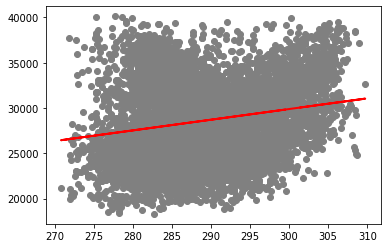

In [62]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [67]:


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 3727.718929374173
Mean Squared Error: 19708487.14763834
Root Mean Squared Error: 4439.424191000263


* "humidity" as independent variables and "total load actual" as dependent variable

In [68]:
X = merge.iloc[: , 3].values.reshape(-1,1)
y = merge.iloc[: , 5].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

[35018.12]
[[-97.3]]


In [69]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,29116.0,30810.339134
1,20520.0,26326.519957
2,36698.0,31845.487543
3,31592.0,27212.671511
4,25727.0,29312.823290
...,...,...
6496,27480.0,26416.620978
6497,26022.0,25994.586392
6498,25566.0,29666.657691
6499,35328.0,27990.209540


The algorithm is still no accurate.

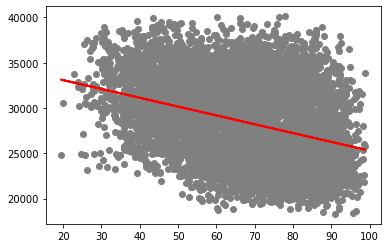

In [70]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3552.66078919262
Mean Squared Error: 18127939.86137016
Root Mean Squared Error: 4257.69184668996


* "wind_speed" as independent variables and "total load actual" as dependent variable

In [72]:
X = merge.iloc[: , 4].values.reshape(-1,1)
y = merge.iloc[: , 5].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

[27328.53]
[[527.87]]


In [73]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,29116.0,28619.125410
1,20520.0,27899.989927
2,36698.0,28946.373847
3,31592.0,28112.101783
4,25727.0,27824.814140
...,...,...
6496,27480.0,27887.981160
6497,26022.0,27942.727194
6498,25566.0,28640.703171
6499,35328.0,28961.035625


# ......

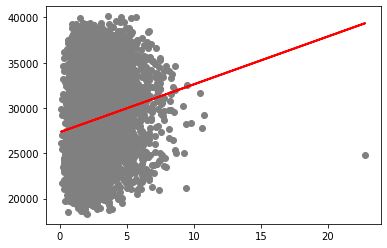

In [74]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3788.889402056273
Mean Squared Error: 20144901.412061773
Root Mean Squared Error: 4488.307187800516


#  Multiple linear Regression

* "temp", "humidity" and "wind_speed" are all independent variables, "Total load actual as dependent variable"

In [76]:
X = merge.iloc[: , [2,3,4]].values
y = merge.iloc[: , 5].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)


45611.32363355554
[ -37.02 -103.97  222.01]


In [77]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,29116.0,30573.827115
1,20520.0,26119.850533
2,36698.0,31602.038546
3,31592.0,27002.957068
4,25727.0,28748.236429
...,...,...
6496,27480.0,26236.561044
6497,26022.0,25545.489860
6498,25566.0,29669.693793
6499,35328.0,28250.673240


In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 3544.380840432379
Mean Squared Error: 18037003.87883447
Root Mean Squared Error: 4246.999397084307


This algorithm get the least mean squared error, but it is still way inaccurate